<a href="https://colab.research.google.com/github/Zoya-Haris/Machine-Learning/blob/main/HeartDisease_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.shape

(918, 12)

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.info()
#5 categorical columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()
#No null values present

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
len(df['Sex'].unique())

2

In [ ]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
len(df['ChestPainType'].unique())

4

In [ ]:
df['RestingECG'].unique()


array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
len(df['RestingECG'].unique())

3

In [ ]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
len(df['ExerciseAngina'].unique())

2

In [ ]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
len(df['ST_Slope'].unique())

3

In [ ]:
X = df
y = df['Sex']


**CONVERT CATEGORICAL VARIABLES INTO NUMERICAL**


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Sex'] = le.fit_transform(X['Sex'])

y = le.transform(y)

In [ ]:
y = df['ChestPainType']
X['ChestPainType'] = le.fit_transform(X['ChestPainType'])

y = le.transform(y)

In [ ]:
y = df['RestingECG']
X['RestingECG'] = le.fit_transform(X['RestingECG'])

y = le.transform(y)

In [ ]:
y = df['ExerciseAngina']
X['ExerciseAngina'] = le.fit_transform(X['ExerciseAngina'])

y = le.transform(y)

In [ ]:
y = df['ST_Slope']
X['ST_Slope'] = le.fit_transform(X['ST_Slope'])

y = le.transform(y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
X.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


In [ ]:
print(round(X.describe(),2))

          Age     Sex ChestPainType RestingBP Cholesterol FastingBS  \
count  918.00  918.00        918.00    918.00      918.00    918.00   
mean     0.52    0.79          0.26      0.66        0.33      0.23   
std      0.19    0.41          0.32      0.09        0.18      0.42   
min      0.00    0.00          0.00      0.00        0.00      0.00   
25%      0.39    1.00          0.00      0.60        0.29      0.00   
50%      0.53    1.00          0.00      0.65        0.37      0.00   
75%      0.65    1.00          0.67      0.70        0.44      0.00   
max      1.00    1.00          1.00      1.00        1.00      1.00   

      RestingECG   MaxHR ExerciseAngina Oldpeak ST_Slope HeartDisease  
count     918.00  918.00         918.00  918.00   918.00       918.00  
mean        0.49    0.54           0.40    0.40     0.68         0.55  
std         0.32    0.18           0.49    0.12     0.30         0.50  
min         0.00    0.00           0.00    0.00     0.00         0.00  


In [ ]:
X = df
cols = X.columns
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0,0.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5,1.0
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0,0.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5,1.0
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0,0.0


In [ ]:
X.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.789760,0.260349,0.661983,0.329684,0.233115,0.494553,0.540911,0.404139,0.396291,0.680828,0.553377
std,0.192502,0.407701,0.318840,0.092571,0.181400,0.423046,0.315836,0.179298,0.490992,0.121201,0.303528,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.000000,0.600000,0.287313,0.000000,0.500000,0.422535,0.000000,0.295455,0.500000,0.000000
50%,0.530612,1.000000,0.000000,0.650000,0.369818,0.000000,0.500000,0.549296,0.000000,0.363636,0.500000,1.000000
75%,0.653061,1.000000,0.666667,0.700000,0.442786,0.000000,0.500000,0.676056,1.000000,0.465909,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X['HeartDisease'].value_counts()

(HeartDisease,)
1.0                508
0.0                410
dtype: int64

In [ ]:
X['HeartDisease'].value_counts()/len(X)

(HeartDisease,)
1.0                0.553377
0.0                0.446623
dtype: float64

In [ ]:
X['Sex'].value_counts()

(Sex,)
1.0       725
0.0       193
dtype: int64

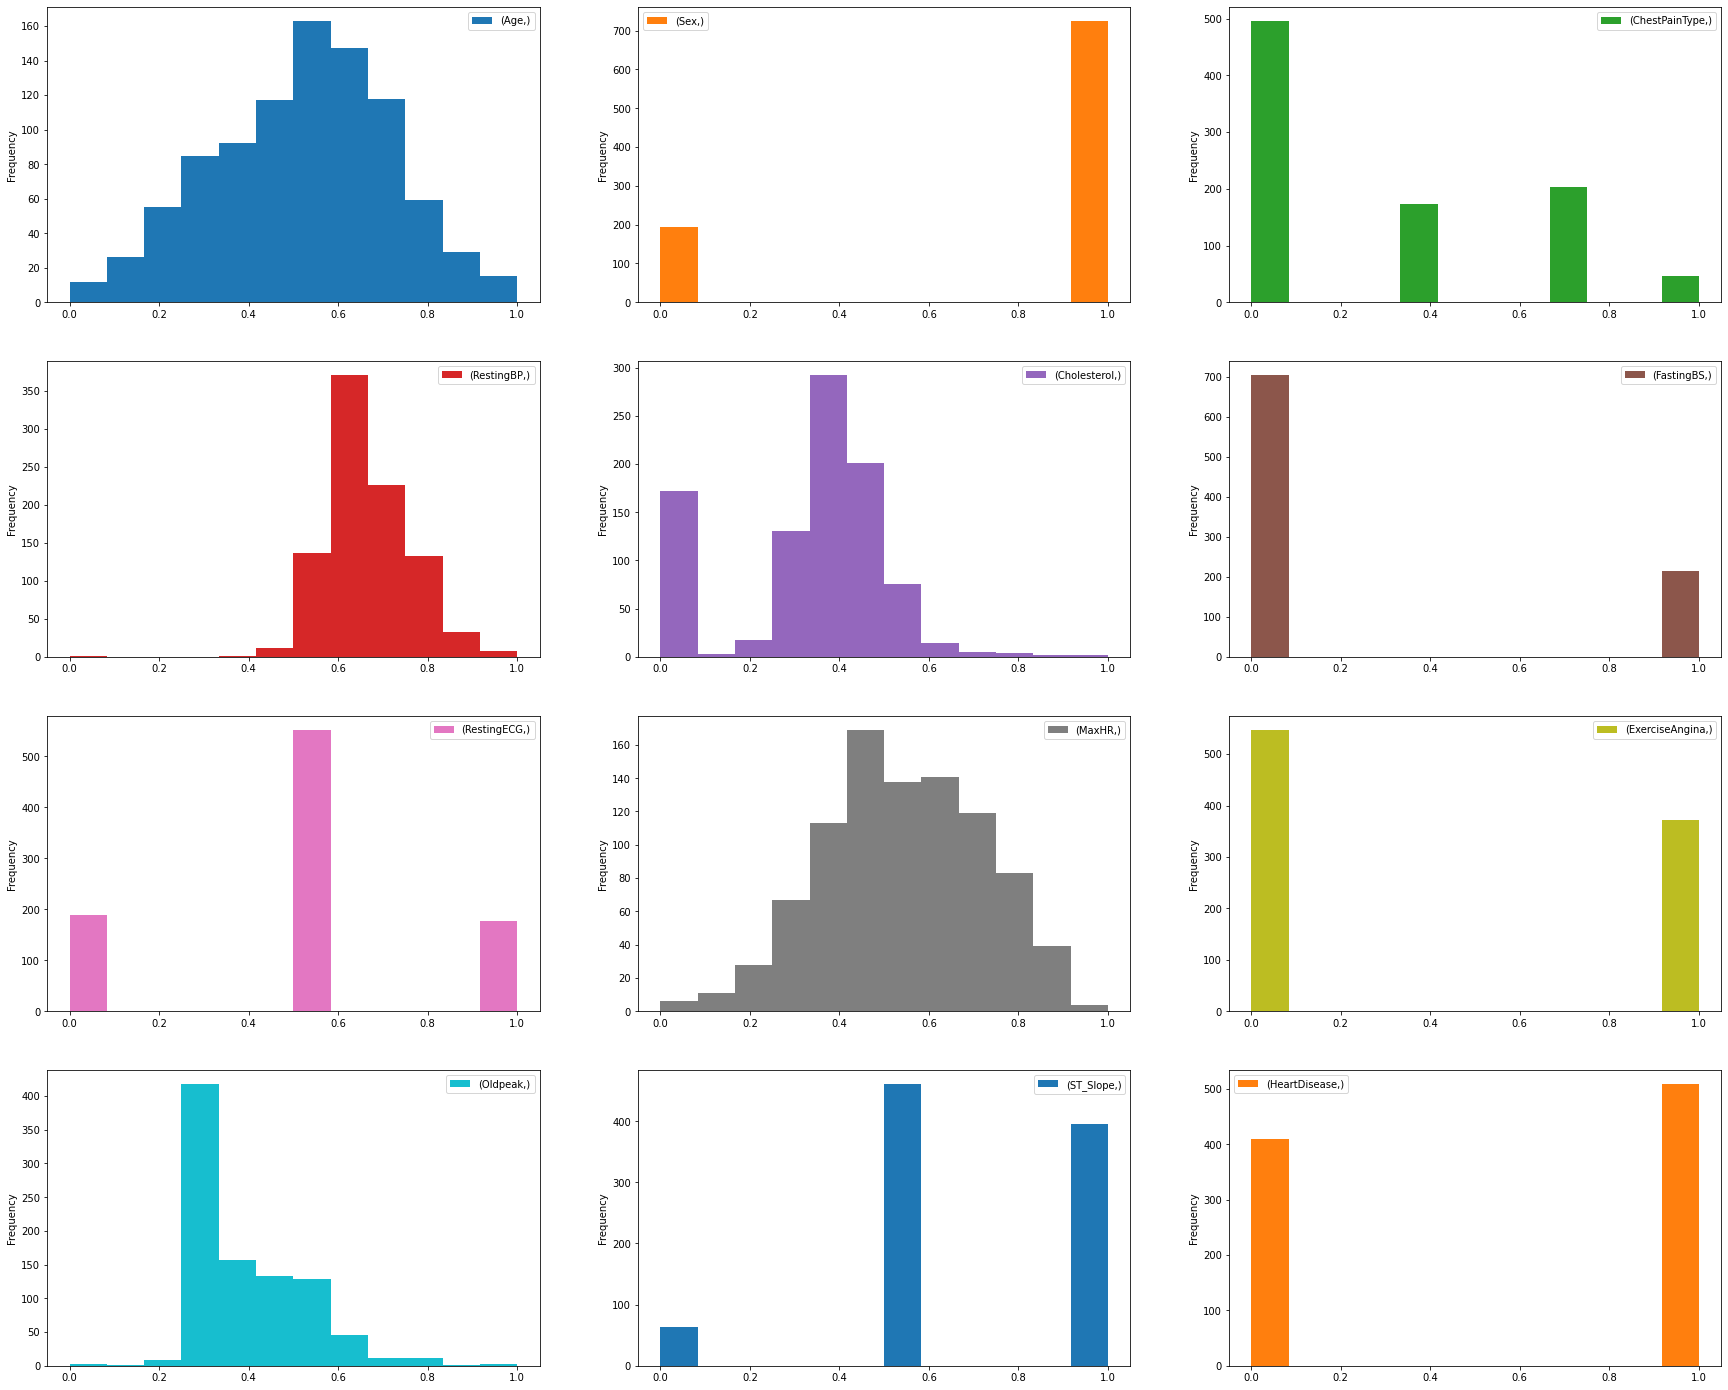

In [ ]:
plt.rcParams['figure.figsize']=(30,25)

X.plot(kind='hist', bins=12, subplots=True, layout=(4,3), sharex=False, sharey=False)

plt.show()

In [ ]:
correlation = df.corr()

In [ ]:
correlation['HeartDisease'].sort_values(ascending= False)

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

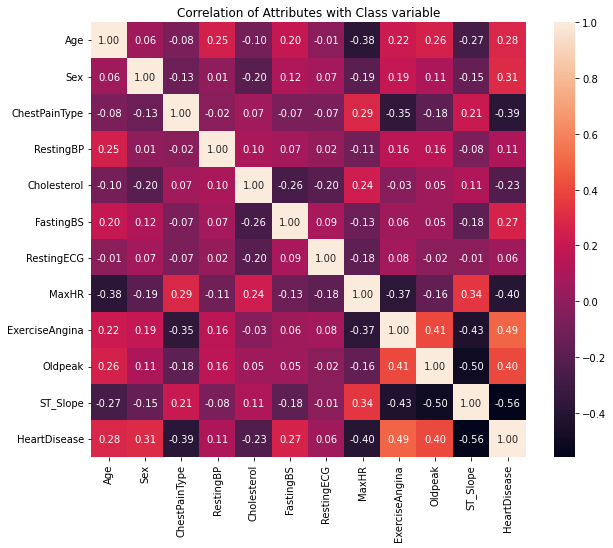

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
plt.show()

In [ ]:
X = df.drop(['HeartDisease'], axis=1)

y = df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((734, 11), (184, 11))

In [ ]:
X_train.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
dtype: object

In [ ]:
X_train.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [ ]:
X_test.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [ ]:
cols = X_train.columns


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])


In [ ]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,1.753540,0.51740,-0.826864,0.403985,-1.850065,1.894070,-0.002171,0.793140,1.199391,1.055374,-0.593573
1,-0.817871,0.51740,-0.826864,-0.950506,-1.850065,-0.527964,-0.002171,-0.924506,1.199391,0.577847,-0.593573
2,1.217829,-1.93274,1.276838,1.487578,1.498941,-0.527964,-1.595848,0.558916,-0.833757,-0.090691,1.044331
3,1.324972,0.51740,-0.826864,0.403985,-0.556976,-0.527964,-0.002171,-1.666216,1.199391,0.100320,-0.593573
4,0.574977,0.51740,-0.826864,0.403985,-1.850065,-0.527964,1.591505,-0.768356,1.199391,0.100320,-0.593573


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)



knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
knn.predict_proba(X_test)[:,0]

array([0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.33333333, 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.33333333,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.33333333, 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.33333333, 1.        , 1.        , 0.        , 0.        ,
       0.66666667, 0.        , 1.        , 1.        , 1.        ,
       0.        , 0.33333333, 0.33333333, 0.66666667, 0.        ,
       0.33333333, 0.        , 0.33333333, 0.        , 1.        ,
       0.66666667, 0.        , 1.        , 0.        , 0.     

In [ ]:
knn.predict_proba(X_test)[:,1]


array([1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.66666667, 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.66666667, 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.66666667, 0.        , 0.        , 1.        , 1.        ,
       0.33333333, 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.66666667, 0.66666667, 0.33333333, 1.        ,
       0.66666667, 1.        , 0.66666667, 1.        , 0.        ,
       0.33333333, 1.        , 0.        , 1.        , 1.     

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8587


In [ ]:
y_pred_train = knn.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9087


In [ ]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

#These two values are quite comparable. So, there is no question of overfitting and underfitting

Training set score: 0.9087
Test set score: 0.8587
